In [2]:
pip install textblob



  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 195.7 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 195.7 kB/s eta 0:00:03
   ----- --------------------------------- 8

In [4]:
pip install wordcloud



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 445.2 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 445.2 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 445.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 602.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 602.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 602.4 kB/s eta 0:00:01
   --------------- ---

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\admin
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\admin
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Import necessary libraries
import os
import docx2txt
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [12]:
# Load the resume data
resume_data = pd.read_csv('resume_data.csv', encoding='utf-8')


In [13]:
# Drop the unnamed index column if it exists
if 'Unnamed: 0' in resume_data.columns:
    resume_data.drop('Unnamed: 0', axis=1, inplace=True)



In [14]:
# Display basic information
print(resume_data.head())
print(resume_data.shape)



                                             content              result
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes
1  Classification: Internal\n\nClassification: In...  Peoplesoft resumes
2  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft resumes
3  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft resumes
4  PeopleSoft Administration\n\n \n\nVivekanand S...  Peoplesoft resumes
(45, 2)


In [15]:
# Define text preprocessing function
def preprocess(sentence):
    wnl = WordNetLemmatizer()
    sentence = str(sentence).lower()
    sentence = re.sub(r'{html}', "", sentence)
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if w not in stopwords.words('english')]
    lemma_words = [wnl.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

# Apply preprocessing
resume_data['lemmatized_content'] = resume_data['content'].apply(preprocess)

# Sentiment Analysis
resume_data['sentiment'] = resume_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)



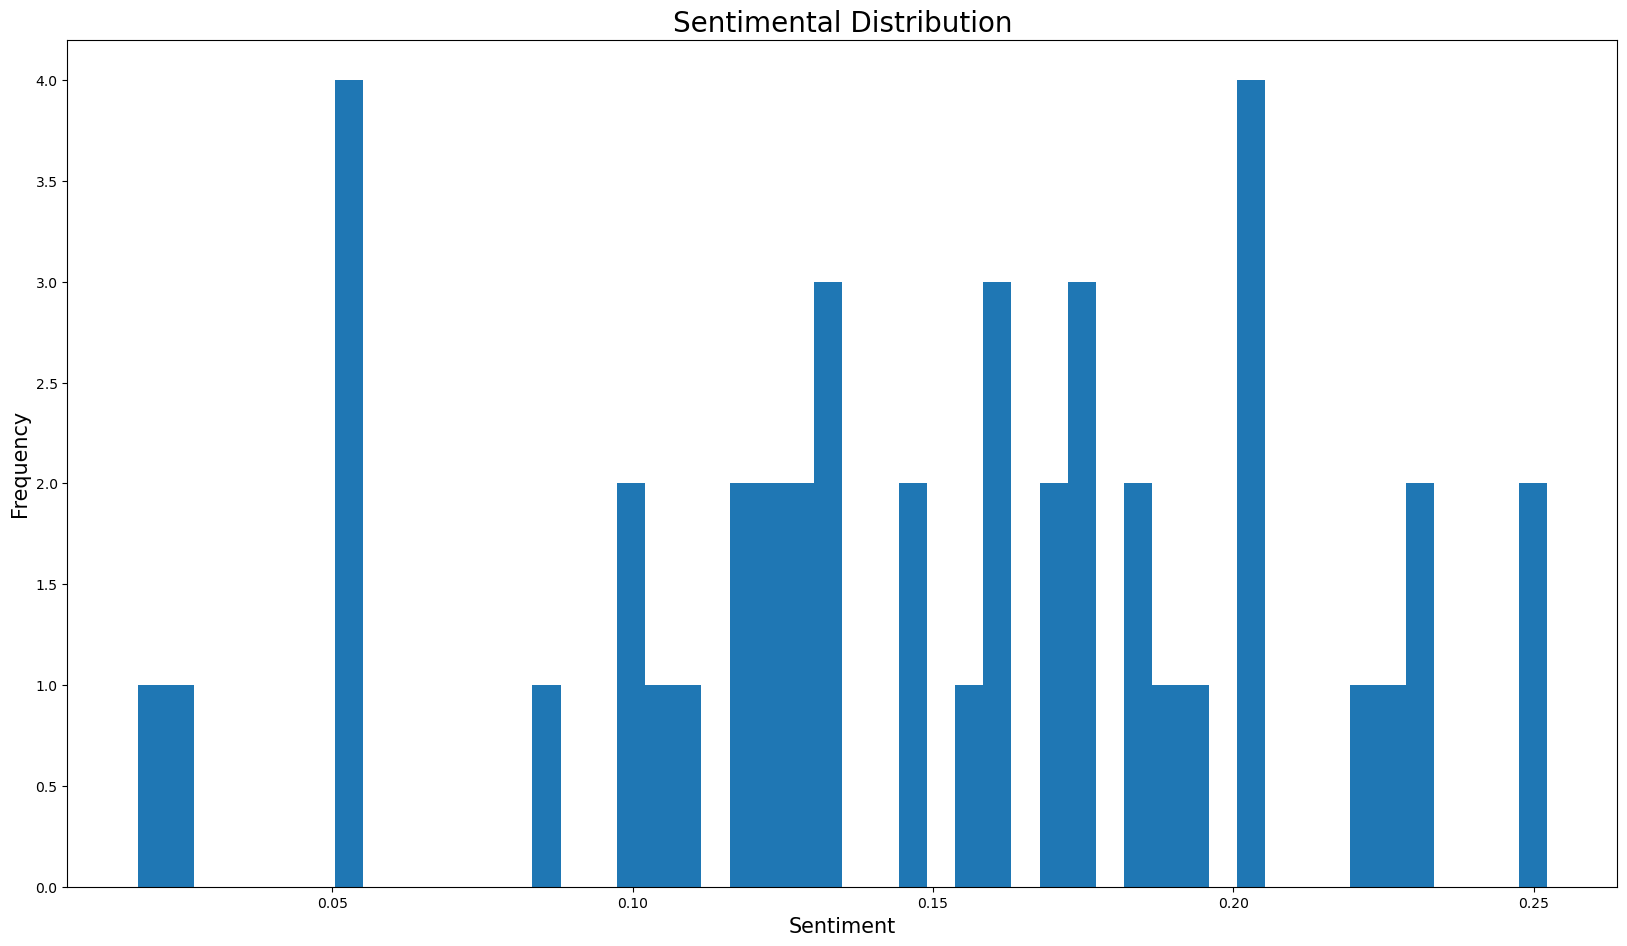

In [16]:
# Visualize sentiment distribution
plt.figure(figsize=(20, 11))
plt.hist(resume_data['sentiment'], bins=50)
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sentimental Distribution', fontsize=20)
plt.show()

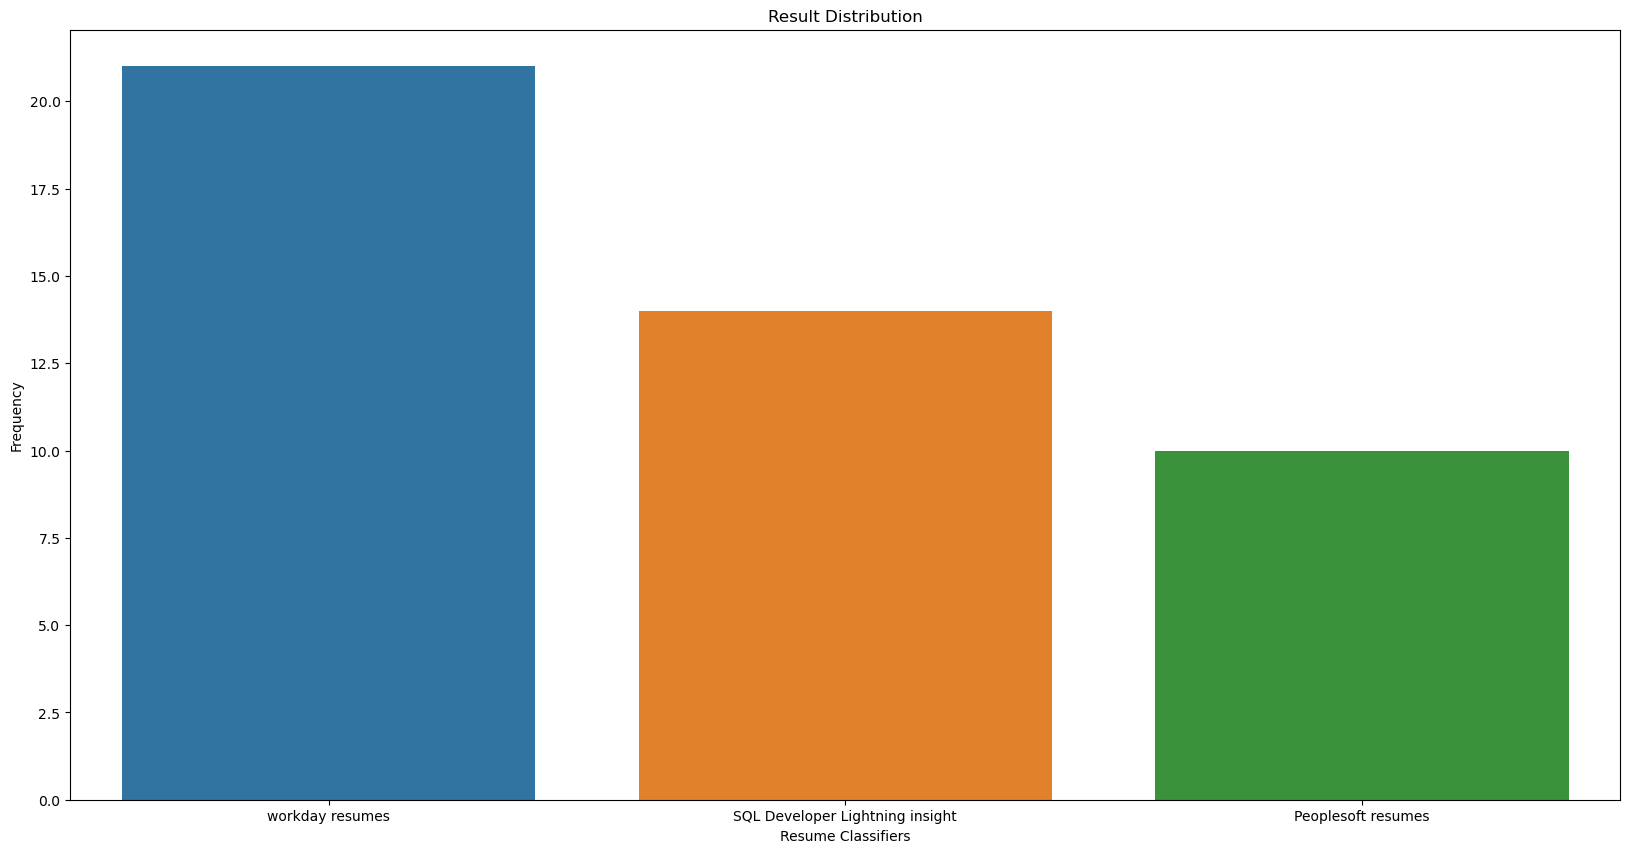

In [17]:
# Plot result distribution
plt.figure(figsize=(20, 10))
sns.barplot(x=resume_data['result'].value_counts().index, y=resume_data['result'].value_counts().values)
plt.title('Result Distribution')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Resume Classifiers', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

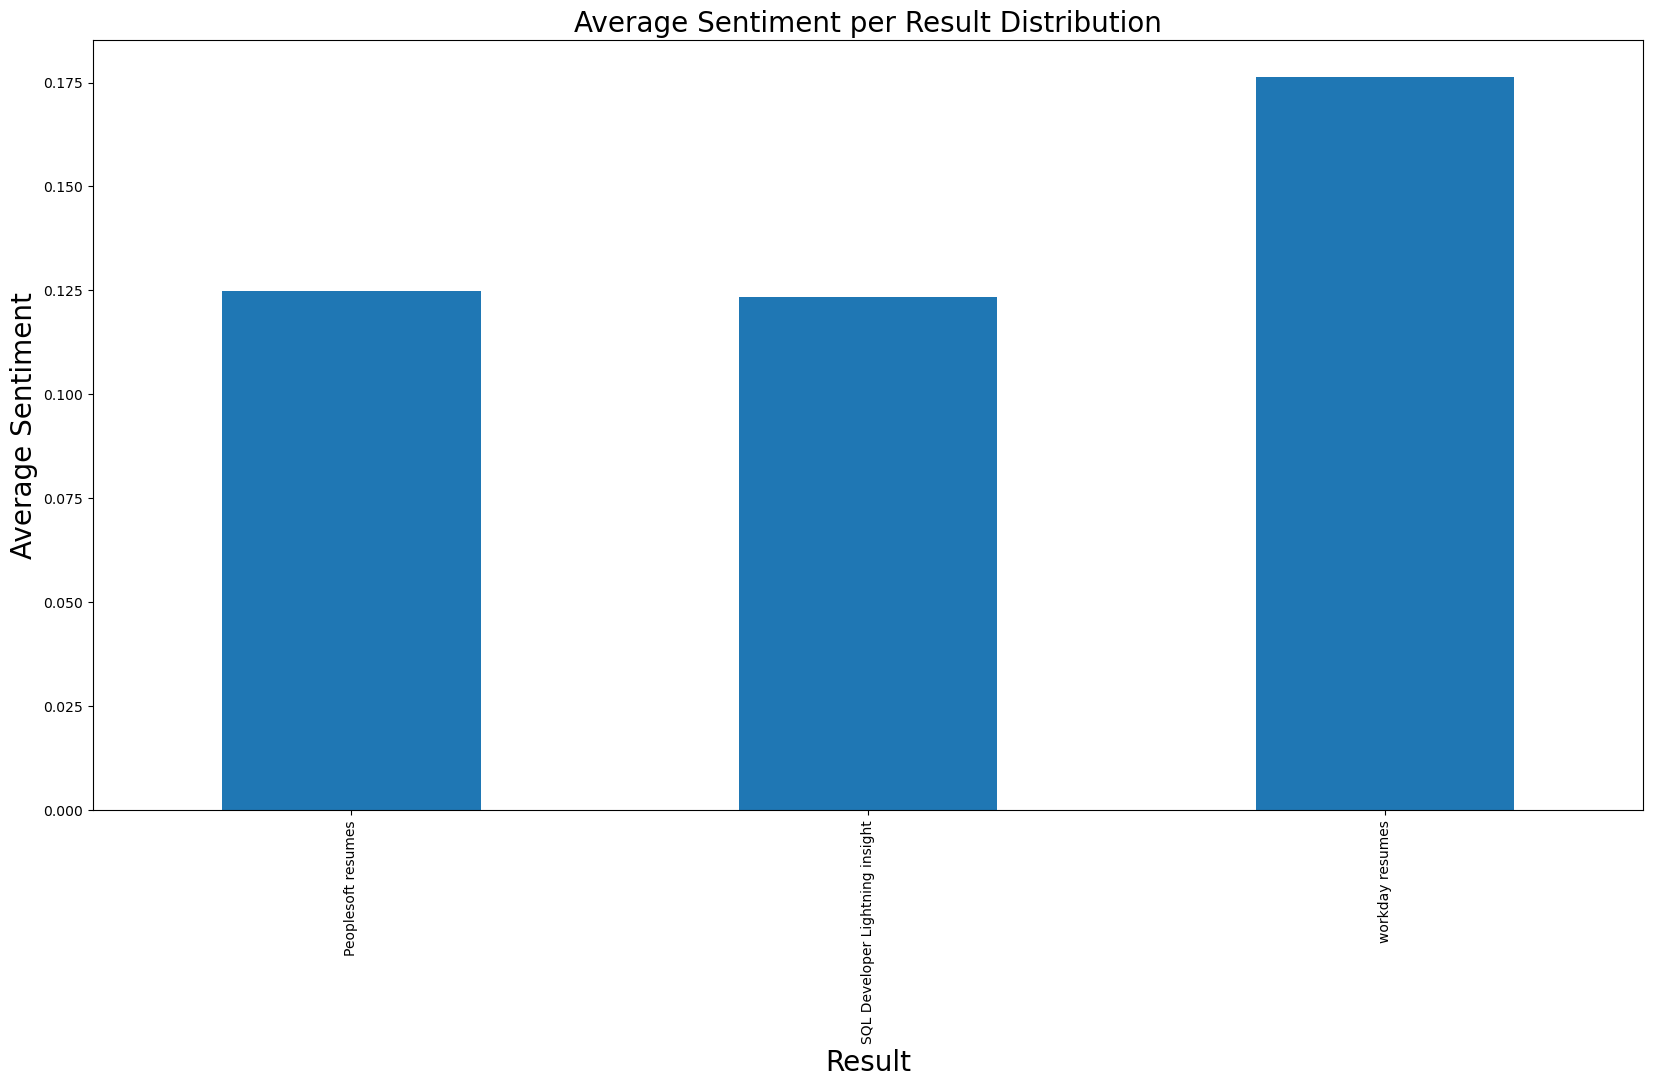

In [18]:
# Average Sentiment per Result Distribution
resume_data.groupby('result')['sentiment'].mean().plot(kind='bar', figsize=(20, 10))
plt.xlabel('Result', fontsize=20)
plt.ylabel('Average Sentiment', fontsize=20)
plt.title('Average Sentiment per Result Distribution', fontsize=20)
plt.show()

In [19]:
# Word count and result length
resume_data['word_count'] = resume_data['content'].apply(lambda x: len(str(x).split()))
resume_data['result_len'] = resume_data['content'].astype(str).apply(len)

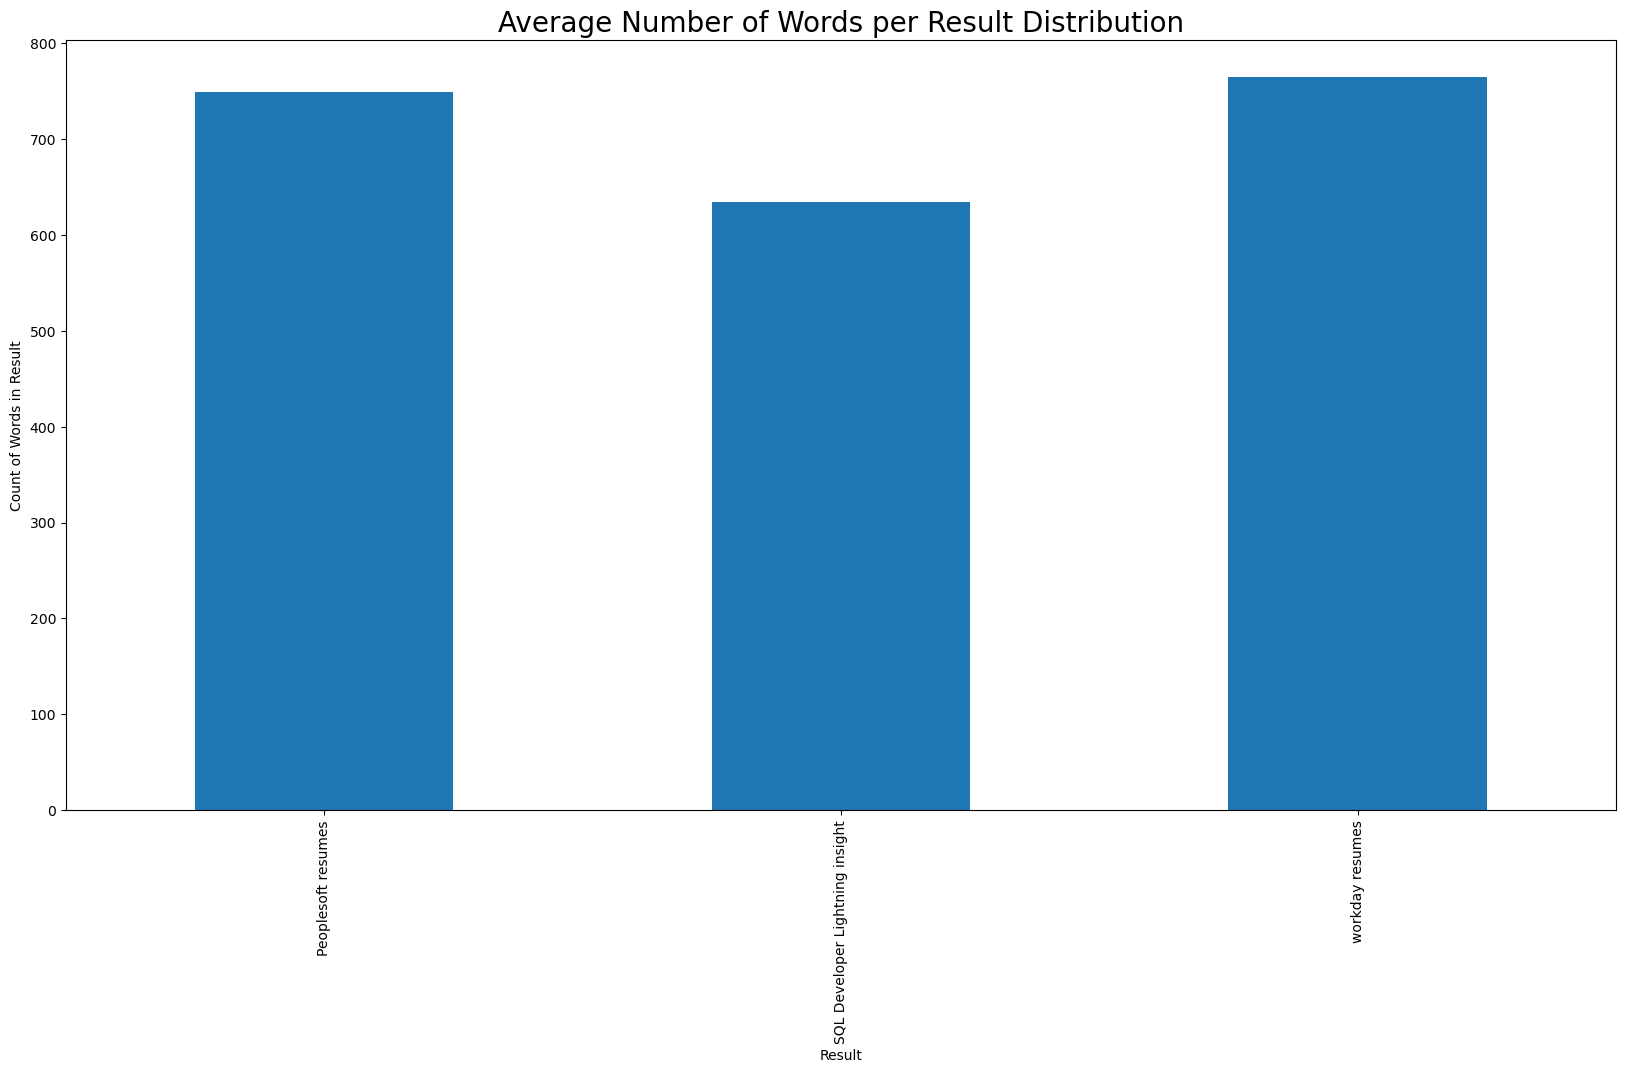

In [20]:
# Average number of words per result distribution
resume_data.groupby('result')['word_count'].mean().plot(kind='bar', figsize=(20, 10))
plt.xlabel('Result')
plt.ylabel('Count of Words in Result')
plt.title('Average Number of Words per Result Distribution', fontsize=20)
plt.show()

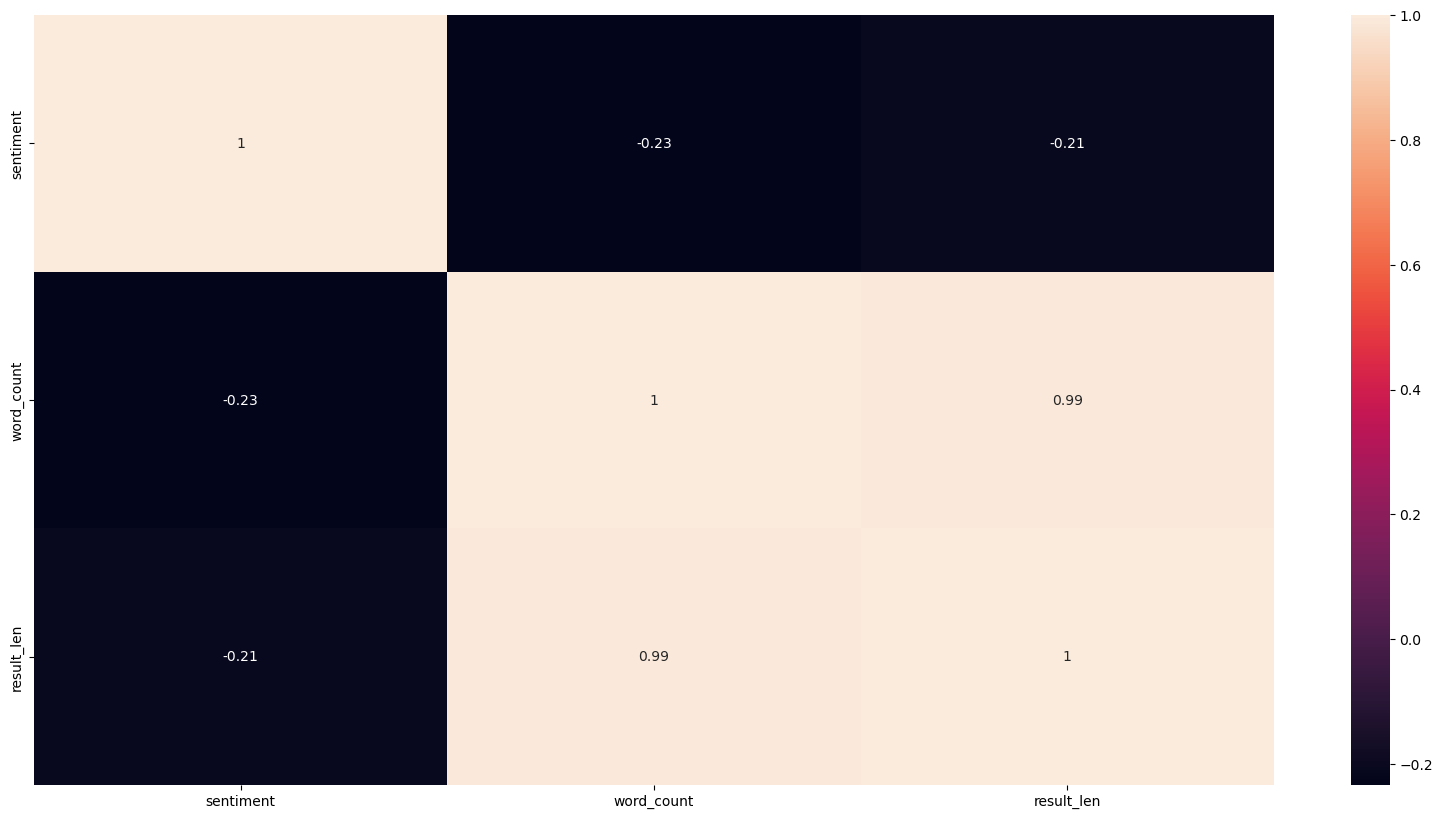

In [21]:

# Correlation heatmap
plt.figure(figsize=(20, 10))
correlation = resume_data[['sentiment', 'word_count', 'result_len']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

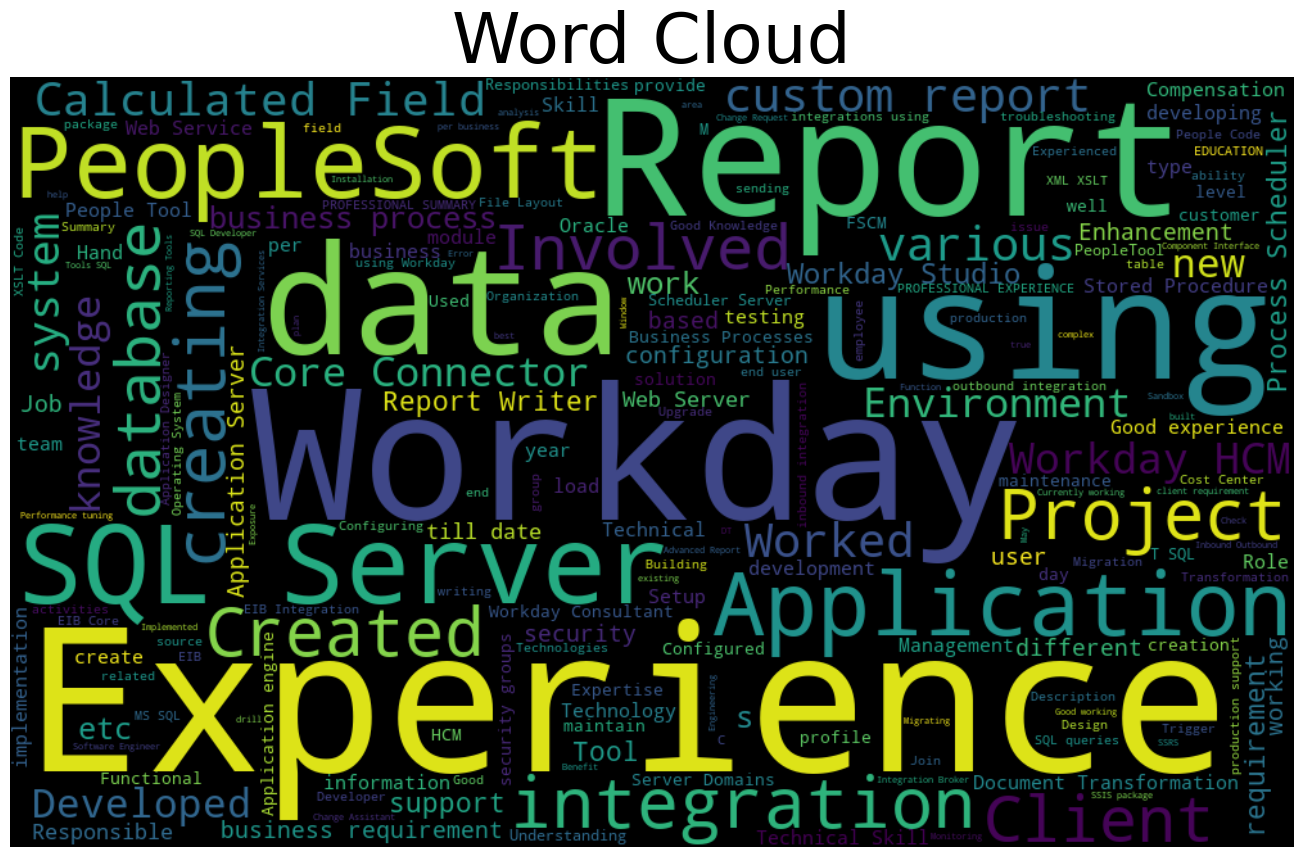

In [22]:

# Word Cloud of Most Common Words
all_words = ' '.join(resume_data['content'])
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(all_words)
plt.figure(figsize=(20, 10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud', fontsize=50)
plt.show()

In [23]:
# TF-IDF Vectorization
tfidf_vect = TfidfVectorizer(max_features=1000)
X = tfidf_vect.fit_transform(resume_data['lemmatized_content'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, resume_data['result'], test_size=0.5, random_state=30, shuffle=True)

In [24]:
# Function to evaluate model accuracy
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Train Accuracy\n")
    print(classification_report(y_train, y_train_pred))
    print("\nConfusion Matrix\n", confusion_matrix(y_train, y_train_pred))
    print("\nAccuracy Score\n", accuracy_score(y_train, y_train_pred))
    print("*" * 100)
    print("Test Accuracy\n")
    print(classification_report(y_test, y_test_pred))
    print("\nConfusion Matrix\n", confusion_matrix(y_test, y_test_pred))
    print("\nAccuracy Score\n", accuracy_score(y_test, y_test_pred))


# Logistic Regression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
print("Logistic Regression Results:")
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Naive Bayes

In [26]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Naive Bayes Results:")
evaluate_model(nb_model, X_train, y_train, X_test, y_test)

Naive Bayes Results:
Train Accuracy

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         9
                workday resumes       1.00      1.00      1.00         7

                       accuracy                           1.00        22
                      macro avg       1.00      1.00      1.00        22
                   weighted avg       1.00      1.00      1.00        22


Confusion Matrix
 [[6 0 0]
 [0 9 0]
 [0 0 7]]

Accuracy Score
 1.0
****************************************************************************************************
Test Accuracy

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.50      0.67         4
SQL Developer Lightning insight       0.71      1.00      0.83         5
                workday resumes       1.00   

# Random Forest Classifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
print("Random Forest Results:")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Random Forest Results:
Train Accuracy

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         9
                workday resumes       1.00      1.00      1.00         7

                       accuracy                           1.00        22
                      macro avg       1.00      1.00      1.00        22
                   weighted avg       1.00      1.00      1.00        22


Confusion Matrix
 [[6 0 0]
 [0 9 0]
 [0 0 7]]

Accuracy Score
 1.0
****************************************************************************************************
Test Accuracy

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         4
SQL Developer Lightning insight       1.00      1.00      1.00         5
                workday resumes       1.00 

# Gradient Boosting Classifier

In [28]:
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
print("Gradient Boosting Results:")
evaluate_model(gb_model, X_train, y_train, X_test, y_test)


Gradient Boosting Results:
Train Accuracy

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         9
                workday resumes       1.00      1.00      1.00         7

                       accuracy                           1.00        22
                      macro avg       1.00      1.00      1.00        22
                   weighted avg       1.00      1.00      1.00        22


Confusion Matrix
 [[6 0 0]
 [0 9 0]
 [0 0 7]]

Accuracy Score
 1.0
****************************************************************************************************
Test Accuracy

                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         4
SQL Developer Lightning insight       1.00      1.00      1.00         5
                workday resumes       1

In [29]:
# Save the best model using pickle
best_model = gb_model  # Assuming Gradient Boosting is the best based on evaluation
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [32]:
# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vect, file)


In [31]:
print("Model and vectorizer saved.")


Model and vectorizer saved.
